<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/UsedCarPricePredictionSystem-Files/blob/master/Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Building**

The model building phase includes splittingthe data sets into 3 sets, choosing the model, checking for overfitting and underfittingconditions and the hyperparameter tuning.

![alt text](https://i.imgur.com/8a898lH.png)





In [0]:
import pandas as pd    
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score     
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error           # Loading the dataset into a dataframe and performing the desired operations
from sklearn.model_selection import train_test_split
import time                                          # Used to measure the time taken to load the data as a dataframe
import matplotlib.pyplot as plt
    

In [94]:
# Storing the dataset (CSV file) as a pandas dataframe

df = pd.read_csv("/content/drive/My Drive/Dataset/CleanedData.csv")   # Storing the CSV file into a dataframe
df.head(5)

,price,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode,vehicleType_0,vehicleType_1,vehicleType_2,vehicleType_3,vehicleType_4,vehicleType_5,vehicleType_6,vehicleType_7,gearbox_0,gearbox_1
0,650,1995,102,11,150000,10,1,2,33775,0,0,0,0,0,0,1,0,0,1
1,2000,2004,105,10,150000,12,1,19,96224,0,0,0,0,0,0,1,0,0,1
2,2799,2005,140,160,150000,12,3,37,57290,0,0,0,0,0,1,0,0,0,1
3,999,1995,115,160,150000,11,1,37,37269,0,0,0,0,0,1,0,0,0,1
4,2500,2004,131,160,150000,2,1,37,90762,0,0,0,0,0,1,0,0,0,1


In [0]:
selectedFeatures = ['yearOfRegistration','powerPS','model','kilometer','monthOfRegistration','fuelType','brand','postalCode','vehicleType_0','vehicleType_1','vehicleType_2','vehicleType_3','vehicleType_4','vehicleType_5','vehicleType_6','vehicleType_7','gearbox_0','gearbox_1']

In [0]:
X = df[selectedFeatures]
y = df['price']

## **Splitting the dataset into three sets**

The  data  set  will  be  splitted  into  three  distinct  sets  of  labeled  examples  as  shownbelow:

1.   Training set

2.   Validation set

3. Testing set

The holdout sets in this case will be the validation and testing set.  Since this is not a big data, 80% will be the training set, 10% will be validation and 10% will be testing set.



1.   The training will be only used for building (training) the model. The training set can be located [here](https://github.com/Tanu-N-Prabhu/UsedCarPricePredictionSystem-Files/tree/master/Training\%20set)
2.   Validation set will be used to choose the learning algorithm, find the best values of hyper-parameters. The validation set can be located [here](https://github.com/Tanu-N-Prabhu/UsedCarPricePredictionSystem-Files/tree/master/Validation\%20set)

3. Testing set will be used when the model is deployed in production, or for testing purpose. The testing set can be located [here](https://github.com/Tanu-N-Prabhu/UsedCarPricePredictionSystem-Files/tree/master/Testing\%20set)

The `sklearn.model_selection.train_test_split` twice to split the data set into three sets. First to split to train, test and then split train again into validation and train.





In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1) # 0.25 x 0.8 = 0.2

In [0]:
X_train.shape

(76266, 18)

In [0]:
y_test.shape

(9416,)

In [0]:
X_val.shape

(8475, 18)

In [0]:
y_val.shape

(8475,)

In [0]:
X_test.shape

(9416, 18)



---



## **Choosing the best learning algorithm by using validation set**

### **Pipelining**

The main reason for using pipelining is that training different models and testing on the validation sets was easy to perform. Here, at a time 4 different regression models were builded (trained) and tested. All the models were together placed inside the pipeline function such that they were trained and tested simultaneously.


Different regression algorithms will be implemented by using the validation set. The validation set will be specifically used here to choose the best alogorithm (score). 
1. Linear Regression
2. Random Forest Regressor
3. Decision Tree Regressor
4. Support Vector Regressor

In [0]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Apply  Regressor

In [0]:
# Creating the pipelines
pipeline_rf=Pipeline([('scalar1', StandardScaler()),
                     ('rf_regressor',RandomForestRegressor(n_estimators= 250, max_depth= 12, max_features = 17, min_samples_leaf = 9))])

pipeline_dt=Pipeline([('scalar2', StandardScaler()),
                     ('dt_regressor',DecisionTreeRegressor())])

pipeline_lr=Pipeline([('scalar3', StandardScaler()),
                     ('lr_regressor',LinearRegression())])

pipeline_svm=Pipeline([('scalar4', StandardScaler()),
                     ('svr_regressor',svm.SVR())])

# List to store all the model results
pipelines = [pipeline_rf, pipeline_dt, pipeline_lr, pipeline_svm]

In [0]:
start_time = time.time()                                  

# Dictionary of pipelines and Regression types for ease of reference
pipe_dict = {0: 'Random Forest Regression', 1: 'Decision Tree Regressor', 2: 'Linear Regression', 3: 'Support Vector Regression'}
# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)
 
for i,model in enumerate(pipelines):
    pred = model.predict(X_val)
    print("{} Model Accuracy: {}".format(pipe_dict[i],r2_score(y_val, pred)* 100))

print("--- %s seconds ---" % (time.time() - start_time))   # Displaying the time in seconds

Random Forest Regression Model Accuracy: 84.56441462355644
Decision Tree Regressor Model Accuracy: 73.63043257596635
Linear Regression Model Accuracy: 55.75289988835126
Support Vector Regression Model Accuracy: 29.220779313595603
--- 627.6641225814819 seconds ---


As seen from the above accuracy results, Random Forest Regression and DecisionTree Regression have far better results.  In fact, Random Forest Regression has the highest and better accuracy.






---




### **Without Pipelining**

In [97]:
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor().fit(X_train, y_train)
pred = rfr.predict(X_val)
print(r2_score(y_val, pred))

print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

0.843830769909487
--- 45.22931528091431 seconds ---


In [98]:
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = DecisionTreeRegressor().fit(X_train, y_train)
pred = rfr.predict(X_val)
print(r2_score(y_val, pred))

print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

0.7281891205703128
--- 0.5952768325805664 seconds ---


In [99]:
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = LinearRegression().fit(X_train, y_train)
pred = rfr.predict(X_val)
print(r2_score(y_val, pred))

print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

0.5608017549363011
--- 0.07018089294433594 seconds ---


In [100]:
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = svm.SVR().fit(X_train, y_train)
pred = rfr.predict(X_val)
print(r2_score(y_val, pred))

print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

-0.05348582993281803
--- 548.5961494445801 seconds ---


## **Underfitting**

A model has a low bias if it predicts well the labels of the training data. If the same model makes many mistakes on the training data, then the model is prone to have a high bias or the model is definitely under-fitting

**Random forest regression - Predicting the labels of training data**

In [0]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
start_time = time.time()                                  

rfr = RandomForestRegressor().fit(X_train, y_train)
pred = rfr.predict(X_train)
print(r2_score(y_train, pred)* 100)

print("--- %s seconds ---" % (time.time() - start_time))   # Displaying the time in seconds

97.93959526405982
--- 38.97345018386841 seconds ---


In [0]:
df = pd.DataFrame({'Actual': y_train, 'Predicted': pred})
df

,Actual,Predicted
8985,1300,1215.618500
62827,2390,2373.248333
37582,1300,1549.593810
46838,6500,5844.000000
53938,850,989.350000
...,...,...
1962,1200,1388.143333
82051,10199,8991.860000
88392,1900,2205.600000
55772,799,720.356667


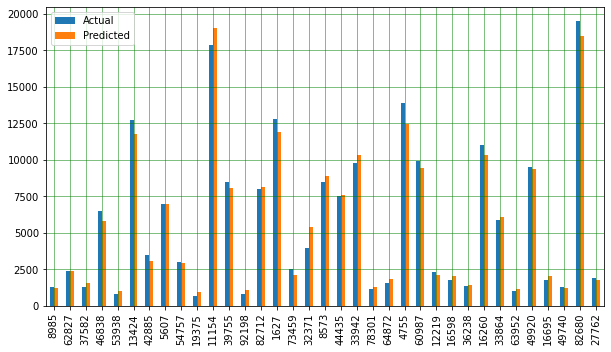

In [0]:
df1 = df.head(35)
df1.plot(kind='bar',figsize=(10,5.5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Since the accuracy is almost 98%, it means that the model is not making manymistakes while predicting the training labels. Because there is not much of a differencebetween the actual and the predicted values as seen above.  Hence the random forestmodel is not under fitting



---



**Decision Tree regression - Predicting the labels of training data**

In [0]:
start_time = time.time()                                  

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_train)
print(r2_score(y_train, pred) * 100)

print("--- %s seconds ---" % (time.time() - start_time))   # Displaying the time in seconds

99.36118948282913
--- 0.5616326332092285 seconds ---


In [0]:
df = pd.DataFrame({'Actual': y_train, 'Predicted': pred})
df

,Actual,Predicted
8985,1300,1463.335526
62827,2390,2140.000000
37582,1300,1266.666667
46838,6500,6500.000000
53938,850,850.000000
...,...,...
1962,1200,1200.000000
82051,10199,10199.000000
88392,1900,1900.000000
55772,799,1043.800000


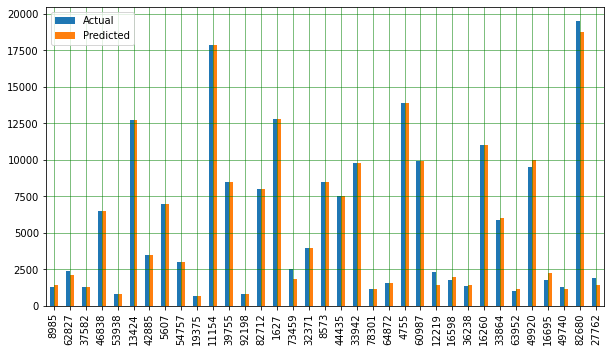

In [0]:
df1 = df.head(35)
df1.plot(kind='bar',figsize=(10,5.5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

The accuracy of the decision tree regression is  99%, it means that the model is not making any mistakes while predicting the training labels (Almost a perfect score). Because there hardly a difference between the actual and the predicted values as seen above.  Hence the decision tree regression is not under fitting.


Overall as seen from the above results both the model did not underfit. Both the models were trained well on the training sets and both predicted the training labels very well.



---



## **Overfitting**

In the case of overfitting the model that overfits predicts very well the training data but poorly the data from at least one of the two holdout sets.

**Random Forest Regression**

In [0]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()   

rfr = RandomForestRegressor().fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))     

84.56992310069393
--- 35.167516469955444 seconds ---


**Decision Tree Regression**


In [0]:
start_time = time.time()                                  

dtr = DecisionTreeRegressor().fit(X_train, y_train)
pred = dtr.predict(X_test)
print(r2_score(y_test, pred) * 100)

print("--- %s seconds ---" % (time.time() - start_time))   # Displaying the time in seconds

74.01567377059317
--- 0.5693495273590088 seconds ---


As seen above the results of decision tree is lower than the Random forest regression.Further hyper parameter tuning will be performed to increase the accuracy as well aschoose the best parameters for random forest regression.

##  **Hyper parameter tuning**

Hyperparameter optimization or tuning is the problem of choosing a set of optimalhyperparameters for a learning algorithm.  Usually a hyper parameter’s value is usedto control a learning algorithm.



> **Note:** The shown below might change every time you run, and this particulars results might differ too. So to see the original results which was conducted intially can be found in my [GitHub](https://github.com/Tanu-N-Prabhu/UsedCarPricePredictionSystem-Files/blob/master/Random_Forest_Manual_tuning_of_parameters.ipynb). I have uploaded a sepaeate notebook, the same results are reported in the project report.



**Manual tuning of parameters**

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe
rfr = RandomForestRegressor(n_estimators= 100, max_depth= 5, max_features = 10, min_samples_leaf = 2).fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

76.67203081274758
--- 5.616417169570923 seconds ---


In [0]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))

Mean Absolute Error is : 1475.8595680548713
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 4388937.31570005


In [0]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = RandomForestRegressor(n_estimators= 150, max_depth= 6, max_features = 11, min_samples_leaf = 3).fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

79.72178413257973
--- 10.596860885620117 seconds ---


In [0]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))

Mean Absolute Error is : 1380.4905833220866
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 3890831.1890781033


In [0]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = RandomForestRegressor(n_estimators= 200, max_depth= 7, max_features = 12, min_samples_leaf = 4).fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

81.44417143688383
--- 17.121926069259644 seconds ---


In [0]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))

Mean Absolute Error is : 1308.7075321957743
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 3560352.497704399


In [0]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = RandomForestRegressor(n_estimators= 210, max_depth= 8, max_features = 13, min_samples_leaf = 5).fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

82.76755243204815
--- 21.724732398986816 seconds ---


In [0]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))

Mean Absolute Error is : 1252.373634323158
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 3306432.1289360994


In [0]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = RandomForestRegressor(n_estimators= 220, max_depth= 9, max_features = 14, min_samples_leaf = 6).fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

83.67134179574155
--- 26.774303197860718 seconds ---


In [0]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))

Mean Absolute Error is : 1213.525547101698
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 3133019.839235353


In [0]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = RandomForestRegressor(n_estimators= 230, max_depth= 10, max_features = 15, min_samples_leaf = 7).fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

84.45818386198273
--- 32.217385053634644 seconds ---


In [0]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))

Mean Absolute Error is : 1179.5231680156317
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 2982046.515338129


In [0]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = RandomForestRegressor(n_estimators= 240, max_depth= 11, max_features = 16, min_samples_leaf = 8).fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

84.97160397986423
--- 38.55518341064453 seconds ---


In [0]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))

Mean Absolute Error is : 1156.2514017045623
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 2883535.333643741


In [0]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = RandomForestRegressor(n_estimators= 250, max_depth= 12, max_features = 17, min_samples_leaf = 9).fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

85.25824455689505
--- 44.99290895462036 seconds ---


In [0]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))

Mean Absolute Error is : 1142.7032152659826
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 2828536.9006228796


In [0]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = RandomForestRegressor(n_estimators= 260, max_depth= 13, max_features = 18, min_samples_leaf = 10).fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

85.3899333299735
--- 53.49248218536377 seconds ---


In [0]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))

Mean Absolute Error is : 1134.9671288139848
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 2803269.451607887


In [0]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = RandomForestRegressor(n_estimators= 270, max_depth= 14, max_features = 18, min_samples_leaf = 11).fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

85.44200757691713
--- 55.09322762489319 seconds ---


In [0]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))

Mean Absolute Error is : 1131.146757947394
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 2793277.837676922


In [0]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = RandomForestRegressor(n_estimators= 280, max_depth= 15, max_features = 18, min_samples_leaf = 12).fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

85.42756029467287
--- 58.34374523162842 seconds ---


In [0]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))

Mean Absolute Error is : 1130.5164312858003
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 2796049.8732800973


As seen from the above results,  at one point the accuracy of the model started to  be  same  and  the  gradually  decrease.   This  was  the  point  where  the  model  was stopped  from  further  predicting  the  test  labels.   So  by  performing  manual  tuning of  hyper  parameters  the  best  parameters  are  `n_estimators`  =  270,  `max_dept`  =  14,`max_features`  =  18,  `min_samplesleaf`  =  11.   These are the best parameters obtained from manual tuning.



---



## **Using Grid search CV to choose the best parameters**







The actual grid search result notebook is in my [GitHub repository](https://github.com/Tanu-N-Prabhu/UsedCarPricePredictionSystem-Files/blob/master/Random_Forest_Using_Grid_Search_CV.ipynb) this was done to main consistency. Because putting everything in a single notebook is not a good way.

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

start_time = time.time()                                                                                
rfr = RandomForestRegressor()
# Parameter of Random Forest Regression
parameters = {
                    "n_estimators":[5,50,150,250,350],
                    "max_depth":[2,4,8,16,None],
                    "max_features":[10, 11, 12, 13, 14],
                    "min_samples_leaf": [2, 3, 4, 5, 6]
             }
cv = GridSearchCV(rfr,parameters,cv=2)
cv.fit(X_train, y_train.values.ravel())
print("--- %s seconds ---" % (time.time() - start_time))  

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
display(cv)                                               

So by tuning of hyper parameters using grid search the best parameters are n_estimators = 350, max_dept = 16, max_features = 10, min_samples_leaf = 2.



---



## **Regularization**

Further the concept of regularization was implemented for testing purpose to see ifthere is any new findings.  The two most widely used types of regularization are calledL1 and L2 regularization.  L1 is knows as Lasso and L2 is known as Ridge regression.

### **L1 Regularization (Lasso)**

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**alpha = 10000**

In [109]:
from sklearn.linear_model import Lasso
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rr = Lasso(alpha = 10000)
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print(r2_score(y_test, pred) * 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

-0.0042252399236941685
--- 0.020809650421142578 seconds ---


**alpha = 1000**

In [110]:
from sklearn.linear_model import Lasso
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rr = Lasso(alpha = 1000)
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print(r2_score(y_test, pred) * 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

40.188960421043895
--- 0.023313045501708984 seconds ---


**alpha = 100**

In [111]:
from sklearn.linear_model import Lasso
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rr = Lasso(alpha = 100)
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print(r2_score(y_test, pred) * 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

56.53602625199379
--- 0.025652647018432617 seconds ---


**alpha = 10**

In [112]:
from sklearn.linear_model import Lasso
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rr = Lasso(alpha = 10)
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print(r2_score(y_test, pred) * 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

56.872121216214076
--- 0.028223752975463867 seconds ---


**alpha = 1**

In [113]:
from sklearn.linear_model import Lasso
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rr = Lasso(alpha = 1)
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print(r2_score(y_test, pred) * 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

56.88514458882089
--- 0.02813410758972168 seconds ---


**alpha = 0.1**

In [114]:
from sklearn.linear_model import Lasso
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rr = Lasso(alpha = 0.1)
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print(r2_score(y_test, pred) * 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

56.88610417645656
--- 0.03151345252990723 seconds ---




---



### **L2 Regularization (Ridge)**

**alpha = 10000**

In [115]:
from sklearn.linear_model import Ridge
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rr = Ridge(alpha = 10000)
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print(r2_score(y_test, pred) * 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

56.005916173458516
--- 0.01839733123779297 seconds ---


**alpha = 1000**

In [116]:
from sklearn.linear_model import Ridge
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rr = Ridge(alpha = 1000)
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print(r2_score(y_test, pred) * 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

56.862126442879735
--- 0.017227649688720703 seconds ---


**alpha = 100**

In [117]:
from sklearn.linear_model import Ridge
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rr = Ridge(alpha = 100)
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print(r2_score(y_test, pred) * 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

56.88466608809992
--- 0.02250051498413086 seconds ---


**alpha = 10**

In [118]:
from sklearn.linear_model import Ridge
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rr = Ridge(alpha = 10)
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print(r2_score(y_test, pred) * 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

56.88605350312452
--- 0.017293214797973633 seconds ---


**alpha = 1**

In [119]:
from sklearn.linear_model import Ridge
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rr = Ridge(alpha = 1)
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print(r2_score(y_test, pred) * 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

56.88618326663119
--- 0.020845651626586914 seconds ---


**alpha = 0.1**

In [120]:
from sklearn.linear_model import Ridge
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rr = Ridge(alpha = 0.1)
rr.fit(X_train, y_train)
pred = rr.predict(X_test)
print(r2_score(y_test, pred) * 100)
print("--- %s seconds ---" % (time.time() - start_time))                                                  # Displaying the time in seconds

56.88619615287895
--- 0.019679546356201172 seconds ---




---



## **MSE test vs MSE Train**

This is one of the test used to check overfitting. The mean squared error (MSE) for the training, and, separately, for the test data is computed. If the MSE of the model on the test data is substantially higher than the MSE obtained on the training data, this is a sign of overfitting 

**Training MSE**

In [0]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
pred = clf.predict(X_train)

In [122]:
print("Mean Absolute Error is :", mean_absolute_error(y_train, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_train, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("The R2 square value of Random Forest Regression is :",clf.score(X_train, y_train)* 100)

Mean Absolute Error is : 425.933145314979
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 409102.6184415157
 — — — — — — — — — — — — — — — — — — — — — — — 
The R2 square value of Random Forest Regression is : 97.86171715541867


**Testing MSE**

In [0]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_test, y_test)
pred = clf.predict(X_test)

In [125]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("The R2 square value of Random Forest Regression is :",clf.score(X_test, y_test)* 100)

Mean Absolute Error is : 452.12478346760327
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 451208.3471292572
 — — — — — — — — — — — — — — — — — — — — — — — 
The R2 square value of Random Forest Regression is : 97.66177512764297


As seen from above both the MSE and MAE of training set is not significantly higher  than  the  training  set.   Also,  to  support  let’s  perform  T-test  to  check  the difference between the MSE values of training and testing set.



---



**T-test**

In [126]:
## Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 10
a = np.array ([409055.7933 ,  411257.5183 ,  410579.1215])
b = np.array ([455373.9379 ,  455426.4436 ,  455794.1234])

## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p/100))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.



t = -124.32337778426184
p = 0.02


As seen from the above results the t-test and p value are significantly low.  This indicates that the model is not overfitting.



---



## **Model Performance Assessment**

The model shown above is trained and tested well. The test set contains the examples that the learning algorithm has never seen before, so if our model performs well on predicting the labels of the examples from the test set, we can say that our model generalizes well or, simply, that it’s good. All the parameters were chosen from the grid search cv results.


In [130]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()                                                                                  # Calculating the time taken to convert the dataset from CSV to dataframe

rfr = RandomForestRegressor(max_depth= 16, max_features=10, min_samples_leaf=2, n_estimators=350).fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred)* 100)
print("--- %s seconds ---" % (time.time() - start_time))           

85.99503962884634
--- 40.58843374252319 seconds ---


In [131]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))

Mean Absolute Error is : 1108.9950075720315
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 2702543.7524787914


In [133]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df

,Actual,Predicted
69709,3500,3691.371671
94102,6990,7190.659175
75249,5350,10160.498855
20486,3499,3483.088415
1100,15900,10565.029122
...,...,...
32463,5500,3613.505765
82985,18777,18838.251637
26207,1399,1021.315200
65972,2499,5842.200440


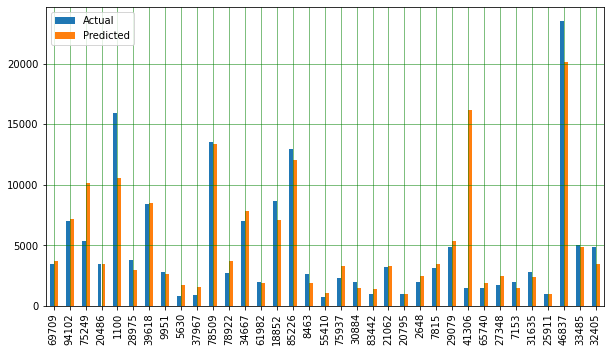

In [134]:
df1 = df.head(35)
df1.plot(kind='bar',figsize=(10,5.5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



---

